<a href="https://colab.research.google.com/github/Ankit231299/Sentimental-Analysis-of-restaurant-reviews/blob/main/Traffic_Pattern_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. IMPORTING THE NEEDFULL  LIBRARIES

In [1]:
import pandas as pd
import pandas as pd
from sklearn.preprocessing import StandardScaler




2. NOW WE HAVE TO LOAD THE DATASETS

In [2]:
from google.colab import files
uploaded = files.upload()


Saving traffic.csv to traffic.csv


In [7]:
import pandas as pd
df = pd.read_csv("traffic.csv")
df.head()


,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [8]:
# Convert DateTime column to datetime format
df["DateTime"] = pd.to_datetime(df["DateTime"])

# Extract time-based features
df["Hour"] = df["DateTime"].dt.hour
df["Day"] = df["DateTime"].dt.day
df["Weekday"] = df["DateTime"].dt.weekday  # 0 = Monday, 6 = Sunday
df["Month"] = df["DateTime"].dt.month

# Drop unnecessary columns (ID and original DateTime)
df.drop(columns=["DateTime", "ID"], inplace=True)

# Display updated dataframe
df.head()


,Junction,Vehicles,Hour,Day,Weekday,Month
0,1,15,0,1,6,11
1,1,13,1,1,6,11
2,1,10,2,1,6,11
3,1,7,3,1,6,11
4,1,9,4,1,6,11


In [11]:
import numpy as np
df["Congestion_Level"] = np.clip(df["Vehicles"] / df["Vehicles"].max() * 100, 0, 100)

# Generate synthetic weather conditions (random selection from common weather types)
weather_conditions = ["Clear", "Cloudy", "Rainy", "Foggy", "Stormy"]
df["Weather"] = np.random.choice(weather_conditions, size=len(df))

# Save the updated dataset
updated_file_path = "traffic.csv"
df.to_csv(updated_file_path, index=False)

# Display the first few rows of the updated dataset
df.head()


,Junction,Vehicles,Hour,Day,Weekday,Month,Congestion_Level,Weather
0,1,15,0,1,6,11,8.333333,Stormy
1,1,13,1,1,6,11,7.222222,Rainy
2,1,10,2,1,6,11,5.555556,Stormy
3,1,7,3,1,6,11,3.888889,Clear
4,1,9,4,1,6,11,5.000000,Stormy


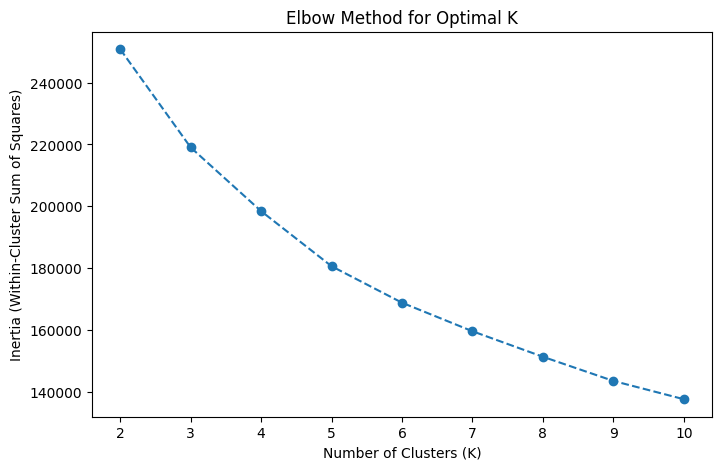

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select relevant features for clustering
features = ["Junction", "Vehicles", "Hour", "Day", "Weekday", "Month", "Congestion_Level"]
X = df[features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
k_range = range(2, 11)  # Checking clusters from 2 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.show()


In [15]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

NameError: name 'traffic' is not defined